LINEAR REGRESSION RESULTS
Mean Squared Error (MSE): 33640657.13645164
Root Mean Squared Error (RMSE): 5800.056649417455
R² Score: 0.7833112270019789


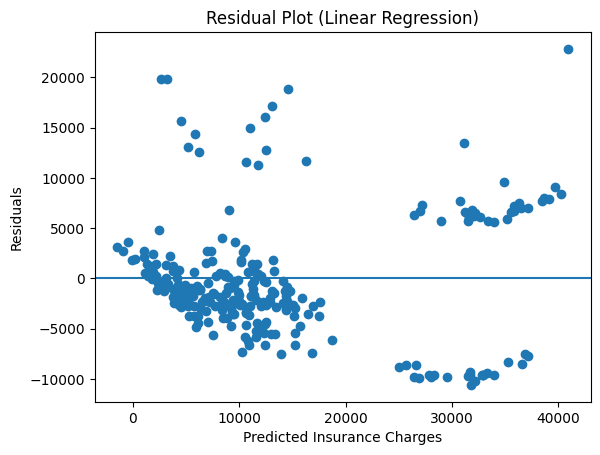


LOGISTIC REGRESSION (WITHOUT TUNING)
Accuracy Score: 0.9701492537313433

Confusion Matrix:
 [[209   5]
 [  3  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       214
           1       0.91      0.94      0.93        54

    accuracy                           0.97       268
   macro avg       0.95      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



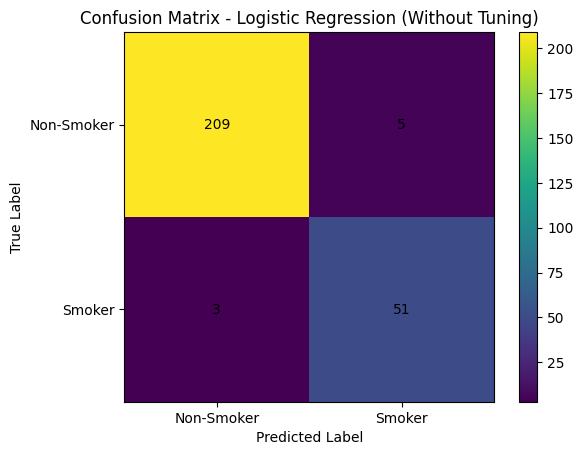


LOGISTIC REGRESSION (WITH HYPERPARAMETER TUNING)
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Accuracy Score: 0.9701492537313433

Confusion Matrix:
 [[209   5]
 [  3  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       214
           1       0.91      0.94      0.93        54

    accuracy                           0.97       268
   macro avg       0.95      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



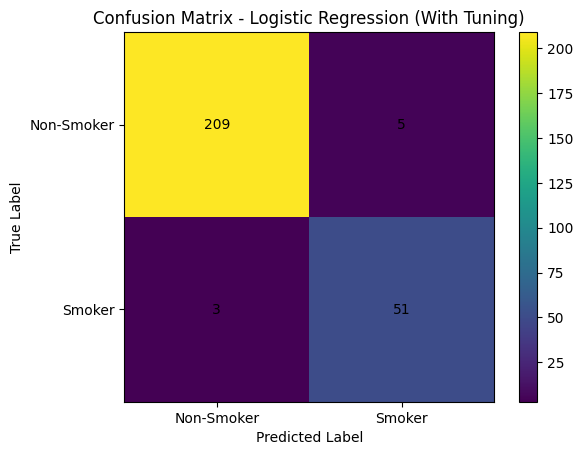

In [ ]:
# Linear & Logistic Regression

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
df = pd.read_csv("insurance.csv")

#  Step 3: Data Preprocessing
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])        # male/female -> 0/1
df['smoker'] = le.fit_transform(df['smoker'])  # yes/no -> 1/0
df['region'] = le.fit_transform(df['region'])  # regions -> numeric


# LINEAR REGRESSION

# Feature and target selection
X_linear = df[['age', 'bmi', 'children', 'smoker', 'region']]
y_linear = df['charges']

# Train-test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

# Model training
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)

# Prediction
y_pred_lr = linear_model.predict(X_test_lr)

# Evaluation
mse = mean_squared_error(y_test_lr, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lr, y_pred_lr)

print("LINEAR REGRESSION RESULTS")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Graph : Residual Plot
residuals = y_test_lr - y_pred_lr

plt.figure()
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Insurance Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()


# LOGISTIC REGRESSION (WITHOUT HYPERPARAMETER TUNING)

# Feature and target selection
X_logistic = df[['age', 'bmi', 'children', 'region', 'charges']]
y_logistic = df['smoker']

# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42
)

# Model training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_log, y_train_log)

# Prediction
y_pred_log = logistic_model.predict(X_test_log)

# Evaluation
accuracy = accuracy_score(y_test_log, y_pred_log)
cm = confusion_matrix(y_test_log, y_pred_log)
report = classification_report(y_test_log, y_pred_log)

print("\nLOGISTIC REGRESSION (WITHOUT TUNING)")
print("Accuracy Score:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Graph : Confusion Matrix (Without Tuning)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Logistic Regression (Without Tuning)")
plt.colorbar()

plt.xticks([0, 1], ["Non-Smoker", "Smoker"])
plt.yticks([0, 1], ["Non-Smoker", "Smoker"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# PART 3: LOGISTIC REGRESSION (WITH HYPERPARAMETER TUNING)

# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearchCV
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Train with tuning
grid.fit(X_train_log, y_train_log)

# Best model
best_logistic_model = grid.best_estimator_

# Prediction
y_pred_tuned = best_logistic_model.predict(X_test_log)

# Evaluation
tuned_accuracy = accuracy_score(y_test_log, y_pred_tuned)
tuned_cm = confusion_matrix(y_test_log, y_pred_tuned)
tuned_report = classification_report(y_test_log, y_pred_tuned)

print("\nLOGISTIC REGRESSION (WITH HYPERPARAMETER TUNING)")
print("Best Parameters:", grid.best_params_)
print("Tuned Accuracy Score:", tuned_accuracy)
print("\nConfusion Matrix:\n", tuned_cm)
print("\nClassification Report:\n", tuned_report)

# Graph : Confusion Matrix (With Tuning)
plt.figure()
plt.imshow(tuned_cm)
plt.title("Confusion Matrix - Logistic Regression (With Tuning)")
plt.colorbar()

plt.xticks([0, 1], ["Non-Smoker", "Smoker"])
plt.yticks([0, 1], ["Non-Smoker", "Smoker"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, tuned_cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
